# Man and Woman Recognition Model (CNN)
***Created by: Engg. Muhammad Saleem Raza***

### Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### Data Augmentation

In [2]:
img_gen = ImageDataGenerator(
                            rotation_range=30,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.2,
                            zoom_range=0.2,
                            fill_mode='nearest',
                            horizontal_flip=True,
                            rescale=1/255)

### Image Data For Training and Testing

In [3]:
input_shape = (48, 48, 1)
batch_size = 128

In [4]:
path = 'E:/Downloads/datasets/male_female/train/'  # path may be different in your case

train_gen = img_gen.flow_from_directory(path,
                                        target_size=input_shape[:2],
                                        batch_size=batch_size,
                                        class_mode='binary',
                                       color_mode='grayscale')

Found 1597 images belonging to 2 classes.


In [5]:
path = 'E:/Downloads/datasets/male_female/test/'  # path may be different in your case

test_gen = img_gen.flow_from_directory(path,
                                        target_size=input_shape[:2],
                                        batch_size=batch_size,
                                        class_mode='binary',
                                      color_mode='grayscale')

Found 340 images belonging to 2 classes.


In [6]:
path = 'E:/Downloads/datasets/male_female/valid/'  # path may be different in your case

valid_gen = img_gen.flow_from_directory(path,
                                        target_size=input_shape[:2],
                                        batch_size=batch_size,
                                        class_mode='binary',
                                       color_mode='grayscale')

Found 338 images belonging to 2 classes.


### Type of Classes

In [7]:
train_gen.class_indices

{'man': 0, 'woman': 1}

###  Network of CNN

In [8]:
model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=input_shape, padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 128)         1

### Compiling Network CNN

In [10]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

### Model Training

In [11]:
result = model.fit_generator(train_gen, epochs=50, steps_per_epoch=150)

Epoch 1/50
150/150 [==============================] - 161s 1s/step - loss: 0.6371 - acc: 0.6414
Epoch 2/50
150/150 [==============================] - 151s 1s/step - loss: 0.5482 - acc: 0.7208
Epoch 3/50
150/150 [==============================] - 150s 997ms/step - loss: 0.5094 - acc: 0.7473
Epoch 4/50
150/150 [==============================] - 163s 1s/step - loss: 0.4805 - acc: 0.7694
Epoch 5/50
150/150 [==============================] - 150s 999ms/step - loss: 0.4503 - acc: 0.7893
Epoch 6/50
150/150 [==============================] - 149s 994ms/step - loss: 0.4191 - acc: 0.8109
Epoch 7/50
150/150 [==============================] - 147s 978ms/step - loss: 0.3775 - acc: 0.8343
Epoch 8/50
150/150 [==============================] - 135s 898ms/step - loss: 0.3332 - acc: 0.8564
Epoch 9/50
150/150 [==============================] - 132s 883ms/step - loss: 0.2896 - acc: 0.8804
Epoch 10/50
150/150 [==============================] - 128s 856ms/step - loss: 0.2628 - acc: 0.8928
Epoch 11/50
150/15

### Graph For Training and Validation (Accuracy and Loss)

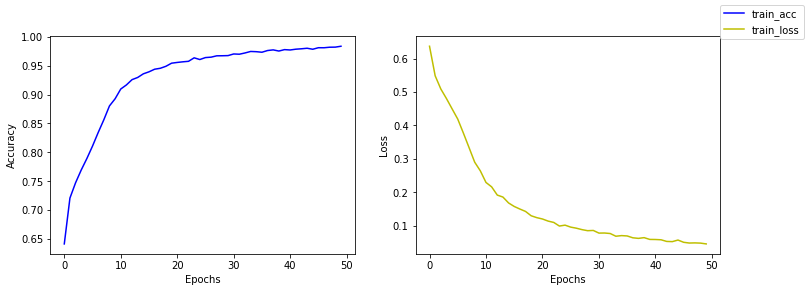

In [12]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(121)
ax.plot(result.history['acc'], color='b', label='train_acc')
# ax.plot(result.history['val_acc'], color='g', label='valid_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

ax2 = fig.add_subplot(122)
ax2.plot(result.history['loss'], color='y', label='train_loss')
# ax2.plot(result.history['val_loss'], color='r', label='valid_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

fig.legend()

In [22]:
eval_loss, eval_acc = model.evaluate_generator(test_gen)

In [23]:
print('Accuracy:', eval_acc)
print('Loss:', eval_loss)

Accuracy: 0.90882355
Loss: 0.22447573890288672


### Saving Model

In [57]:
model.save('gender.h5')
model.save_weights('weight_gender.h5')

### Loading Saved Model

In [5]:
m = load_model('gender.h5')

### Testing on a Particular Image

Man


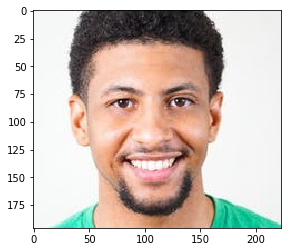

In [32]:
path = 'images/man.jpg'

plt.imshow(load_img(path))

img = load_img(path, target_size=(48, 48), color_mode='grayscale')
img = img_to_array(img)
img /= 255
img = np.expand_dims(img, axis=0)
    
if m.predict_classes(img)[0][0] == 0:
     print('Man')
else:
    print('Woman')